In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as inter
%matplotlib inline

Load a mean pulse profile for B1957+20

(-0.1, 0.8)

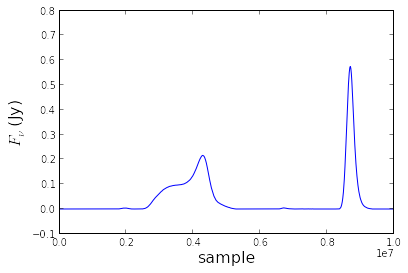

In [2]:
mean_profile = np.load('mean_profile.npy')

meanprof_Jy = (mean_profile / np.median(mean_profile) - 1) * 12.
meanprof_Jy[meanprof_Jy < 0] = 0
#mean_value = (np.mean(mean_profile) / np.median(mean_profile) - 1) * 12.

#print("Mean pulse flux = %s Jy" % (mean_value))

n = 10000000
# 1 sample is 1/n*1.6ms

x = np.arange(1000)
profile = inter.interp1d(x, meanprof_Jy, kind='linear')
xnew = np.arange(0,x.size-1,(x.size-1.)/n)
meanprof_inter = profile(xnew)

plt.plot(meanprof_inter)
plt.xlabel('sample', fontsize=16)
plt.ylabel(r'$F_{\nu}$ (Jy)', fontsize=16)
#plt.xlim(0,1.6e-2)
plt.ylim(-.1, 0.8)

Isolate the main pulse, sqrt it, and center

(-0.1, 0.8)

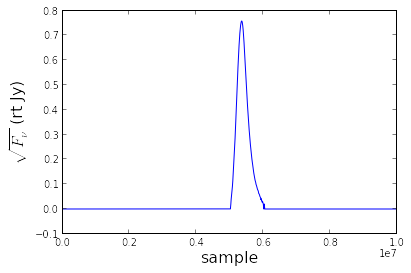

In [3]:
pulse_ref = meanprof_inter

for i in np.arange(meanprof_inter.size):
    if (float(i) < n*830./1000. or float(i) > n*940./1000.):
        pulse_ref[i] = 0

pulse_ref = np.sqrt(pulse_ref)
pulse_ref = np.roll(pulse_ref, -n/3)

plt.plot(pulse_ref)
plt.xlabel('sample', fontsize=16)
plt.ylabel(r'$\sqrt{F_{\nu}}$ (rt Jy)', fontsize=16)
#plt.xlim(0,1.6e-2)
plt.ylim(-.1, 0.8)

Invent some sinusoidal wave at frequency of observed band

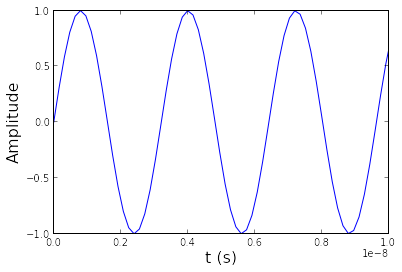

In [4]:
freq = 311.25 # MHz, observed band
p_spin = 1.6 # ms, spin period

freq *= 1e6 #Hz
p_spin *= 1e-3 #s

angular_freq = 2*np.pi*freq
t = np.linspace(0., p_spin, n)
phase_ref = np.sin(angular_freq*t)

plt.plot(t, phase_ref)
plt.xlim(0, 1e-8)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('t (s)', fontsize=16)
plt.ylabel(r'Amplitude', fontsize=16)

Compute an electric field

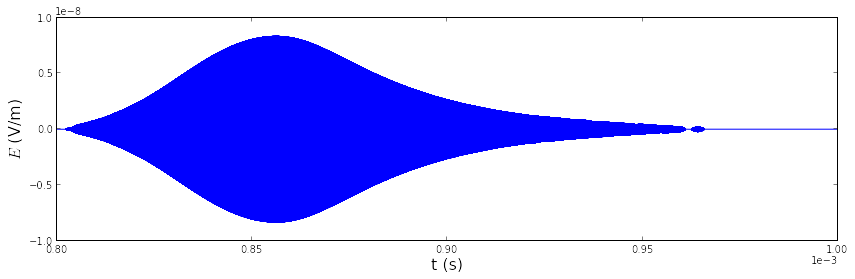

In [9]:
a = 109797  # rt(kg)*m/s^2/A; a = sqrt(2*16MHz/(c*n*epsilon_0)), conversion factor between
            # sqrt(Jansky) and E field strength assuming n=1 and a 16MHz bandwidth

b = 1e-13   # rt(kg)/s; a*b = 1.1e-8 V/m

E_field = a*b*pulse_ref*phase_ref

plt.figure(figsize=(14,4))
plt.plot(t, E_field)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.xlim(0.8e-3,1e-3)
plt.xlabel('t (s)', fontsize=16)
plt.ylabel(r'$E$ (V/m)', fontsize=16)

-20.0803212851 62500.0 62500.0
-19.0803212851 62500.0 62500.0
-18.0803212851 62500.0 62500.0
-17.0803212851 62500.0 62500.0
-16.0803212851 62500.0 62500.0
-15.0803212851 62500.0 62500.0
-14.0803212851 62500.0 62500.0
-13.0803212851 62500.0 62500.0
-12.0803212851 62500.0 62500.0
-11.0803212851 62500.0 62500.0
-10.0803212851 62500.0 62500.0
-9.08032128514 62500.0 62500.0
-8.08032128514 62500.0 62500.0
-7.08032128514 62500.0 62500.0
-6.08032128514 62500.0 62500.0
-5.08032128514 62500.0 62500.0
-4.08032128514 62500.0 62500.0
-3.08032128514 62500.0 62500.0
-2.08032128514 62500.0 62500.0
-1.08032128514 62500.0 62500.0
-0.0803212851406 62500.0 62500.0
0.919678714859 62500.0 62500.0
1.91967871486 62500.0 62500.0
2.91967871486 62500.0 62500.0
3.91967871486 62500.0 62500.0
4.91967871486 62500.0 62500.0
5.91967871486 62500.0 62500.0
6.91967871486 62500.0 62500.0
7.91967871486 62500.0 62500.0
8.91967871486 62500.0 62500.0
9.91967871486 62500.0 62500.0
10.9196787149 62500.0 62500.0
11.9196787149 62

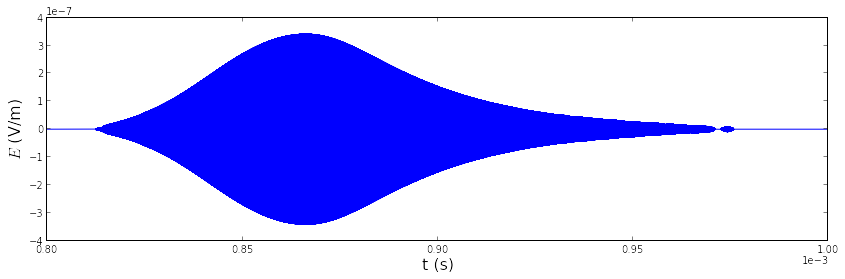

In [15]:
# x in the following functions should be in s

p_phase = 1./freq # s, E field oscillation period
R = 6.273 # s, pulsar-companion distance

def tau_str(x):
    return 1e-5 #s
def tau_geom(x):
    return x**2/(2*R)
def tau_phase(x):
    return -tau_str(x) + tau_geom(x)
def tau_group(x):
    return tau_str(x) + tau_geom(x)

E_field = np.zeros(n)
E_tot = np.zeros(n)
pulse = np.zeros(n)
phase = np.zeros(n)
i = -1*p_phase*n/p_spin

while (i < 1*p_phase*n/p_spin):
    print i, -tau_phase(i*p_spin/n)*n/p_spin, tau_group(i*p_spin/n)*n/p_spin
    phase = np.roll(phase_ref, (int)(-tau_phase(i*p_spin/n)*n/p_spin))
    pulse = np.roll(pulse_ref, (int)(tau_group(i*p_spin/n)*n/p_spin))
    E_field = a*b*phase*pulse
    E_tot += E_field
    i+=1

plt.figure(figsize=(14,4))
#plt.plot(t.reshape(-1,1e3).mean(axis=1), E_tot.reshape(-1,1e3).mean(axis=1)) # downsampling before plotting.
plt.plot(t, E_tot)
plt.xlim(0.8e-3,1.0e-3)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.xlabel('t (s)', fontsize=16)
plt.ylabel(r'$E$ (V/m)', fontsize=16)